<a href="https://colab.research.google.com/github/rellethy/Projects/blob/main/491HousingForecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
housing_df= pd.read_csv('/content/train (1).csv')
X

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [102]:
# show percentage of features missing values
cat_missing =housing_df.isnull().sum()
cat_total =housing_df.isnull().count()
cat_miss_percent = cat_missing / cat_total
df_missing = pd.DataFrame(
    cat_miss_percent,
    columns=['Missing Value']
).sort_values(
    by='Missing Value',
    ascending=False
)

df_missing.head(20)

,Missing Value
PoolQC,0.995205
MiscFeature,0.963014
Alley,0.937671
Fence,0.807534
MasVnrType,0.597260
FireplaceQu,0.472603
LotFrontage,0.177397
GarageYrBlt,0.055479
GarageCond,0.055479
GarageType,0.055479


In [103]:
# drop some of the most missing values features columns
most_miss_col = df_missing[df_missing['Missing Value'] > 0.06].index
housing_df=housing_df.drop(columns=most_miss_col)

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [104]:
# select numeric features
num_col =housing_df.select_dtypes(exclude=['object'])

num_col.isnull().sum().sort_values(ascending=False).head(5)

,0
GarageYrBlt,81
MasVnrArea,8
Id,0
OpenPorchSF,0
KitchenAbvGr,0


In [105]:
from sklearn.impute import SimpleImputer

# convert numeric features nan values into mean values
num_imputer = SimpleImputer(strategy='median')
num_impute_train = num_imputer.fit_transform(num_col)
num_col = pd.DataFrame(num_impute_train, columns=num_col.columns)
X[num_col.columns] = num_col

num_col.isnull().sum().sort_values(ascending=False).head(5)


,0
Id,0
HalfBath,0
KitchenAbvGr,0
TotRmsAbvGrd,0
Fireplaces,0


In [106]:
# select categorical feature
cat_col =housing_df.select_dtypes(include=['object'])

cat_col.isnull().sum().sort_values(ascending=False).head(15)

,0
GarageCond,81
GarageQual,81
GarageFinish,81
GarageType,81
BsmtExposure,38
BsmtFinType2,38
BsmtCond,37
BsmtFinType1,37
BsmtQual,37
Electrical,1


In [107]:
# convert categorical features nan values into mode values
cat_imputer = SimpleImputer(strategy='most_frequent')
cat_impute_train = cat_imputer.fit_transform(cat_col)
cat_col = pd.DataFrame(cat_impute_train, columns=cat_col.columns)
X[cat_col.columns] = cat_col

cat_col.isnull().sum().sort_values(ascending=False).head(15)


,0
MSZoning,0
BsmtQual,0
BsmtExposure,0
BsmtFinType1,0
BsmtFinType2,0
Heating,0
HeatingQC,0
CentralAir,0
Electrical,0
KitchenQual,0


In [108]:
def combine_features(df):
    df['TotalLivArea'] = df['GrLivArea'] + df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
    df['TotalBath'] = df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath'])
    df['GarageScore'] = df['GarageCars'] + df['GarageArea'] / 100
    return df

housing_df= combine_features(X)

X

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalLivArea,TotalBath,GarageScore
0,1.0,60.0,RL,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,2.0,2008.0,WD,Normal,208500.0,4276.0,3.5,7.48
1,2.0,20.0,RL,9600.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0.0,0.0,5.0,2007.0,WD,Normal,181500.0,3786.0,2.5,6.60
2,3.0,60.0,RL,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,9.0,2008.0,WD,Normal,223500.0,4492.0,3.5,8.08
3,4.0,70.0,RL,9550.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0.0,0.0,2.0,2006.0,WD,Abnorml,140000.0,4190.0,2.0,9.42
4,5.0,60.0,RL,14260.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0.0,0.0,12.0,2008.0,WD,Normal,250000.0,5541.0,3.5,11.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,RL,7917.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,8.0,2007.0,WD,Normal,175000.0,4247.0,2.5,6.60
1456,1457.0,20.0,RL,13175.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,2.0,2010.0,WD,Normal,210000.0,5688.0,3.0,7.00
1457,1458.0,70.0,RL,9042.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,2500.0,5.0,2010.0,WD,Normal,266500.0,5832.0,2.0,3.52
1458,1459.0,20.0,RL,9717.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,4.0,2010.0,WD,Normal,142125.0,3234.0,2.0,3.40


In [109]:
# overview dataset to check for unnecessary features
unnecessary_features = [
                        'Street', 'Utilities', 'LandSlope',
                        'Condition1', 'Condition2',
                        'RoofMatl', 'Exterior2nd', 'ExterCond',
                        'Heating', 'Electrical',
                        'MoSold', 'SaleCondition'
                       ]

housing_df=housing_df.drop(columns=unnecessary_features)
X

,Id,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,Neighborhood,BldgType,HouseStyle,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SaleType,SalePrice,TotalLivArea,TotalBath,GarageScore
0,1.0,60.0,RL,8450.0,Reg,Lvl,Inside,CollgCr,1Fam,2Story,...,0.0,0.0,0.0,0.0,2008.0,WD,208500.0,4276.0,3.5,7.48
1,2.0,20.0,RL,9600.0,Reg,Lvl,FR2,Veenker,1Fam,1Story,...,0.0,0.0,0.0,0.0,2007.0,WD,181500.0,3786.0,2.5,6.60
2,3.0,60.0,RL,11250.0,IR1,Lvl,Inside,CollgCr,1Fam,2Story,...,0.0,0.0,0.0,0.0,2008.0,WD,223500.0,4492.0,3.5,8.08
3,4.0,70.0,RL,9550.0,IR1,Lvl,Corner,Crawfor,1Fam,2Story,...,0.0,0.0,0.0,0.0,2006.0,WD,140000.0,4190.0,2.0,9.42
4,5.0,60.0,RL,14260.0,IR1,Lvl,FR2,NoRidge,1Fam,2Story,...,0.0,0.0,0.0,0.0,2008.0,WD,250000.0,5541.0,3.5,11.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,RL,7917.0,Reg,Lvl,Inside,Gilbert,1Fam,2Story,...,0.0,0.0,0.0,0.0,2007.0,WD,175000.0,4247.0,2.5,6.60
1456,1457.0,20.0,RL,13175.0,Reg,Lvl,Inside,NWAmes,1Fam,1Story,...,0.0,0.0,0.0,0.0,2010.0,WD,210000.0,5688.0,3.0,7.00
1457,1458.0,70.0,RL,9042.0,Reg,Lvl,Inside,Crawfor,1Fam,2Story,...,0.0,0.0,0.0,2500.0,2010.0,WD,266500.0,5832.0,2.0,3.52
1458,1459.0,20.0,RL,9717.0,Reg,Lvl,Inside,NAmes,1Fam,1Story,...,0.0,0.0,0.0,0.0,2010.0,WD,142125.0,3234.0,2.0,3.40


In [110]:
# categorical overview target feature correlation
cat_col =housing_df.select_dtypes(include=['object'])
# numeric overview target feature correlation
corr_housing_df=housing_df.corr(numeric_only=True)
corr_Xtarget = corr_X['SalePrice']

corr_Xtarget

,SalePrice
Id,-0.021917
MSSubClass,-0.084284
LotArea,0.263843
OverallQual,0.790982
OverallCond,-0.077856
YearBuilt,0.522897
YearRemodAdd,0.507101
MasVnrArea,0.472614
BsmtFinSF1,0.386420
BsmtFinSF2,-0.011378


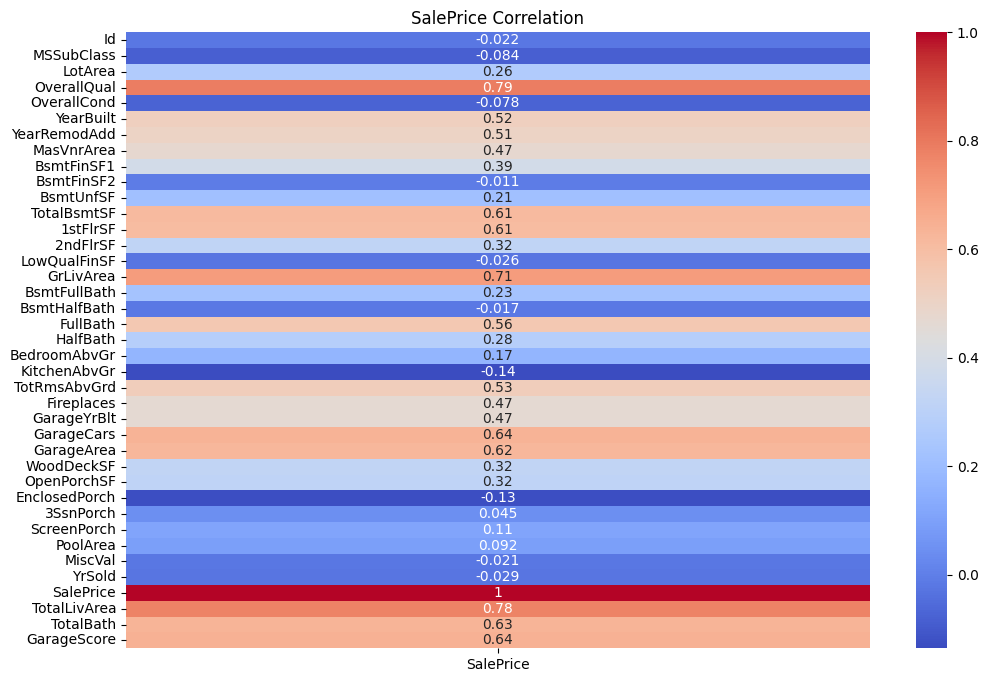

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot target feature correlation
plt.figure(figsize=(12, 8))
sns.heatmap(corr_X[['SalePrice']], annot=True, cmap='coolwarm')
plt.title('SalePrice Correlation')
plt.show()


In [112]:
# filter out unnecessary features columns
unnecessary_col = corr_Xtarget[abs(corr_Xtarget) < 0.1].index.tolist()
housing_df=housing_df.drop(columns=unnecessary_col)

X

,MSZoning,LotArea,LotShape,LandContour,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,YearBuilt,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SaleType,SalePrice,TotalLivArea,TotalBath,GarageScore
0,RL,8450.0,Reg,Lvl,Inside,CollgCr,1Fam,2Story,7.0,2003.0,...,Y,0.0,61.0,0.0,0.0,WD,208500.0,4276.0,3.5,7.48
1,RL,9600.0,Reg,Lvl,FR2,Veenker,1Fam,1Story,6.0,1976.0,...,Y,298.0,0.0,0.0,0.0,WD,181500.0,3786.0,2.5,6.60
2,RL,11250.0,IR1,Lvl,Inside,CollgCr,1Fam,2Story,7.0,2001.0,...,Y,0.0,42.0,0.0,0.0,WD,223500.0,4492.0,3.5,8.08
3,RL,9550.0,IR1,Lvl,Corner,Crawfor,1Fam,2Story,7.0,1915.0,...,Y,0.0,35.0,272.0,0.0,WD,140000.0,4190.0,2.0,9.42
4,RL,14260.0,IR1,Lvl,FR2,NoRidge,1Fam,2Story,8.0,2000.0,...,Y,192.0,84.0,0.0,0.0,WD,250000.0,5541.0,3.5,11.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,7917.0,Reg,Lvl,Inside,Gilbert,1Fam,2Story,6.0,1999.0,...,Y,0.0,40.0,0.0,0.0,WD,175000.0,4247.0,2.5,6.60
1456,RL,13175.0,Reg,Lvl,Inside,NWAmes,1Fam,1Story,6.0,1978.0,...,Y,349.0,0.0,0.0,0.0,WD,210000.0,5688.0,3.0,7.00
1457,RL,9042.0,Reg,Lvl,Inside,Crawfor,1Fam,2Story,7.0,1941.0,...,Y,0.0,60.0,0.0,0.0,WD,266500.0,5832.0,2.0,3.52
1458,RL,9717.0,Reg,Lvl,Inside,NAmes,1Fam,1Story,5.0,1950.0,...,Y,366.0,0.0,112.0,0.0,WD,142125.0,3234.0,2.0,3.40


In [113]:
import numpy as np

# separate the target feature and reduce its skewness
y =housing_df['SalePrice']
housing_df=housing_df.drop(columns=['SalePrice'])
y = np.log1p(y)
y

,SalePrice
0,12.247699
1,12.109016
2,12.317171
3,11.849405
4,12.429220
...,...
1455,12.072547
1456,12.254868
1457,12.493133
1458,11.864469


In [114]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# identify numeric and categorical features
numFT_housing_df=housing_df.select_dtypes(include=['int64', 'float64']).columns
catFT_housing_df=housing_df.select_dtypes(exclude=['int64', 'float64']).columns

# pipeline for data scaling
scaling = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numFT_X),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), catFT_X)
    ]
)


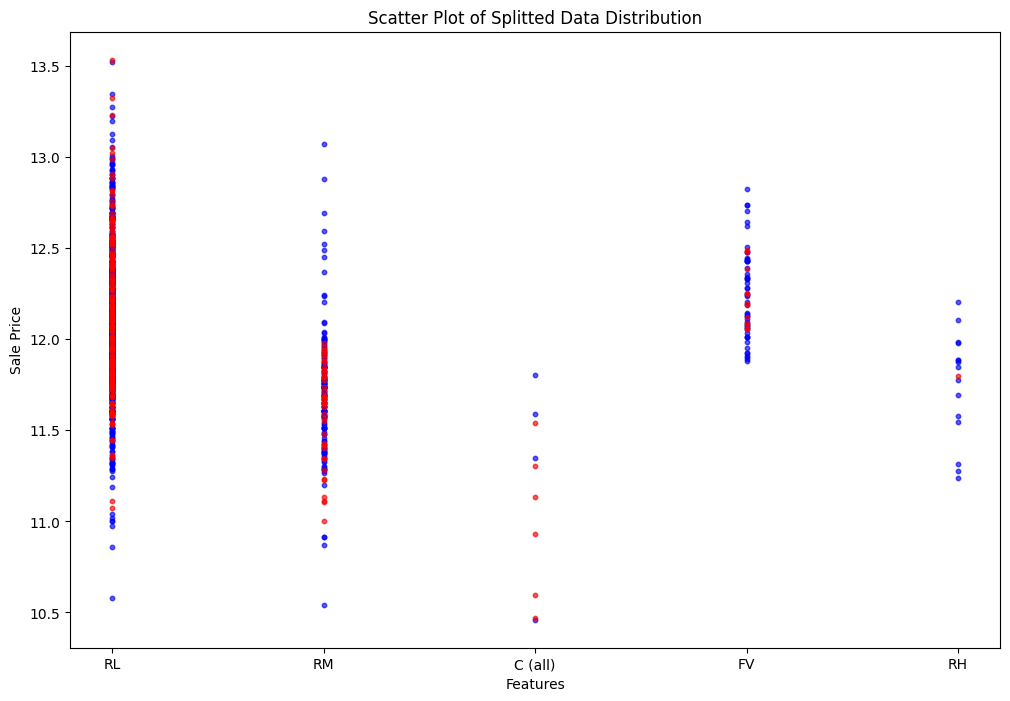

In [115]:
from sklearn.model_selection import train_test_split

# let's split the dataset 80% training and 20% validation
bins = pd.cut(y, bins=5, labels=False)
X_train,housing_df_val, y_train, y_val = train_test_split(X, y, train_size=0.80, random_state=42)

# plot splitted data
plt.figure(figsize=(12, 8))
plt.scatter(X.iloc[:,0], y, color='gray', alpha=0.2, label='Original Data', s=10)
plt.scatter(X_train.iloc[:,0], y_train, color='blue', alpha=0.6, label='Training Data', s=10)
plt.scatter(X_val.iloc[:,0], y_val, color='red', alpha=0.6, label='Validation Data', s=10)

plt.title('Scatter Plot of Splitted Data Distribution')
plt.xlabel('Features')
plt.ylabel('Sale Price')
plt.show()


In [116]:
from sklearn.linear_model import LinearRegression

# linear model pipeline
linear_pipeline = Pipeline(
    steps = [
        ('preprocessor', scaling),
        ('linear', LinearRegression())
    ]
)

# fit the data into the pipeline
linear_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCa...
                                                  Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
       'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType'],
      dtype='object'))])),
                ('linear', LinearRegression())])

In [117]:
from sklearn.metrics import mean_squared_error

# predict fitted model
y_pred = linear_pipeline.predict(X_val)

# mean squared error from the dataset and predicted
mse = mean_squared_error(y_val, y_pred)

np.sqrt(mse)


0.1363730004420664